Implementing KNN algorithm .

In [2]:
import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common


Load the iris  data set and state the general information of the data set.

In [3]:
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()

# Get general information
data = iris.data
target = iris.target
target_names = iris.target_names

# Print general information
print("Number of classes:", len(iris.target_names))
print("Class names:", iris.target_names)
print("Number of samples:", data.shape[0])
print("Number of features:", data.shape[1])
print("Feature names:", iris.feature_names)


Number of classes: 3
Class names: ['setosa' 'versicolor' 'virginica']
Number of samples: 150
Number of features: 4
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Draw the **scatter plot** of the **iris** data set.

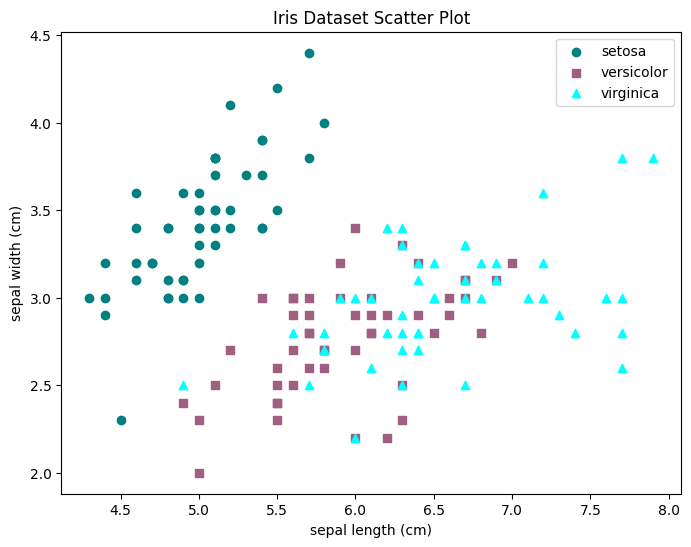

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

# Create a scatter plota scatter plot
plt.figure(figsize=(8, 6))

# Define unique colors and markers for each class
colors = ['#008080', '#9F5F80', '#00FFFF']
markers = ['o', 's', '^']

# Plot each class with a unique color and marker
for i, target_name in enumerate(target_names):
    plt.scatter(
        data[target == i, 0],
        data[target == i, 1],
        label=target_name,
        color=colors[i],
        marker=markers[i],
    )

# Set labels and legend
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris Dataset Scatter Plot")
plt.legend()

# Show the plot
plt.show()


Normalization

In [5]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X = scaler.fit_transform(data)


Dividing the iris dataset into training and evaluation.

In [6]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and evaluation sets (80% training, 20% evaluation)
X_train, X_eval, y_train, y_eval = train_test_split(X, target, test_size=0.2, random_state=42)



# Print the shapes of training and evaluation sets
print("Training set shape - Features:", X_train.shape, "Labels:", y_train.shape)
print("Evaluation set shape - Features:", X_eval.shape, "Labels:", y_eval.shape)

Training set shape - Features: (120, 4) Labels: (120,)
Evaluation set shape - Features: (30, 4) Labels: (30,)


For k = 5.

In [7]:
# Initialize KNN classifier
knn = KNN(k=5)

# Fit the classifier with training data
knn.fit(X_train, y_train)

# Predict on training data
train_predictions = knn.predict(X_train)

# Predict on evaluation data
eval_predictions = knn.predict(X_eval)

# Calculate accuracy for training and evaluation data
train_accuracy = np.mean(train_predictions == y_train)
eval_accuracy = np.mean(eval_predictions == y_eval)

print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Evaluation accuracy: {eval_accuracy * 100:.2f}%")

Training accuracy: 95.83%
Evaluation accuracy: 100.00%


For K = 1 to 10.

K = 1: Training Accuracy = 1.0000, Evaluation Accuracy = 1.0000
K = 2: Training Accuracy = 0.9667, Evaluation Accuracy = 1.0000
K = 3: Training Accuracy = 0.9583, Evaluation Accuracy = 1.0000
K = 4: Training Accuracy = 0.9583, Evaluation Accuracy = 1.0000
K = 5: Training Accuracy = 0.9583, Evaluation Accuracy = 1.0000
K = 6: Training Accuracy = 0.9583, Evaluation Accuracy = 1.0000
K = 7: Training Accuracy = 0.9667, Evaluation Accuracy = 1.0000
K = 8: Training Accuracy = 0.9667, Evaluation Accuracy = 1.0000
K = 9: Training Accuracy = 0.9583, Evaluation Accuracy = 1.0000
K = 10: Training Accuracy = 0.9667, Evaluation Accuracy = 1.0000


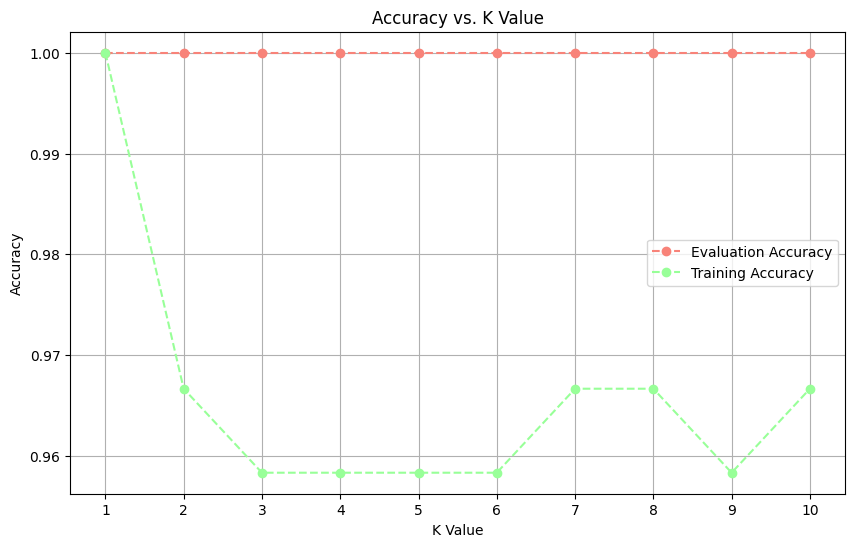

The best k based on evaluation accuracy is: 1 with an accuracy of 1.0000


In [8]:
import matplotlib.pyplot as plt

# Initialize arrays to store accuracy values for different k
train_accuracies = []
eval_accuracies = []

# Loop through different values of k
for k in range(1, 11):
    knn = KNN(k=k)
    knn.fit(X_train, y_train)

    # Predict on training data
    train_predictions = knn.predict(X_train)
    train_accuracy = np.mean(train_predictions == y_train)
    train_accuracies.append(train_accuracy)

    # Predict on evaluation data
    eval_predictions = knn.predict(X_eval)
    eval_accuracy = np.mean(eval_predictions == y_eval)
    eval_accuracies.append(eval_accuracy)

    print(f"K = {k}: Training Accuracy = {train_accuracy:.4f}, Evaluation Accuracy = {eval_accuracy:.4f}")

# Plotting the accuracies for different k values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), eval_accuracies, marker='o', linestyle='dashed', color='#F88379', label='Evaluation Accuracy')
plt.plot(range(1, 11), train_accuracies, marker='o', linestyle='dashed', color='#98FF98', label='Training Accuracy')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)
plt.show()



best_k = np.argmax(eval_accuracies) + 1  # +1 to convert index to k value
best_accuracy = max(eval_accuracies)

print(f"The best k based on evaluation accuracy is: {best_k} with an accuracy of {best_accuracy:.4f}")


implementing KNN and test it with the library .

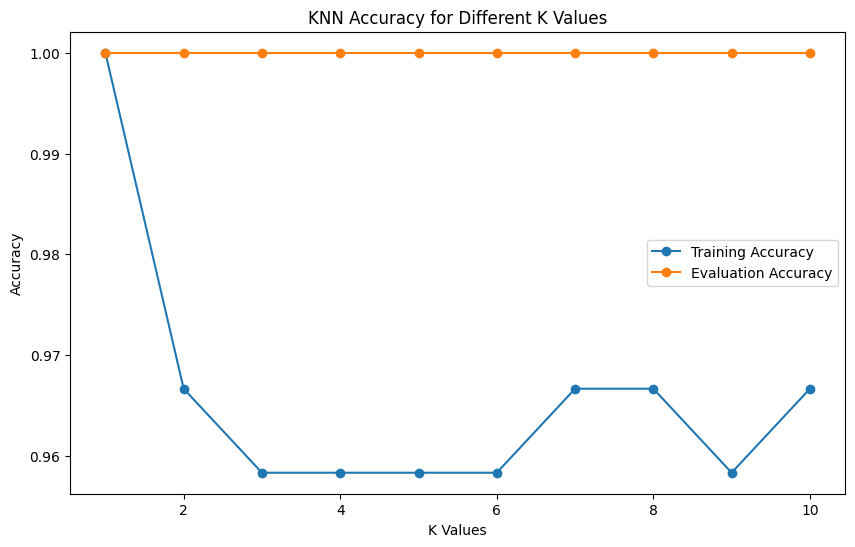

The best K value based on evaluation accuracy is: 1


In [9]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_eval, y_eval are training and evaluation data

train_accuracy = []
eval_accuracy = []

for k in range(1, 11):
    # Create KNN model
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Predict on training data
    train_pred = knn.predict(X_train)
    train_accuracy.append(accuracy_score(y_train, train_pred))

    # Predict on evaluation data
    eval_pred = knn.predict(X_eval)
    eval_accuracy.append(accuracy_score(y_eval, eval_pred))

# Plotting the accuracy for different K values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_accuracy, marker='o', label='Training Accuracy')
plt.plot(range(1, 11), eval_accuracy, marker='o', label='Evaluation Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Identify the best K value
best_k = eval_accuracy.index(max(eval_accuracy)) + 1
print(f"The best K value based on evaluation accuracy is: {best_k}")
